In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, inspect, func

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [6]:
# Use the Inspector to explore the database and print the table names
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [7]:
# inspect the contents of measurement table
engine.execute('SELECT * FROM measurement LIMIT 3').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0)]

In [8]:
# inspect the contents of station table
engine.execute('SELECT * FROM station LIMIT 3').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)]

In [9]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [12]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [13]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [14]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

Text(0.5, 0, 'Date')

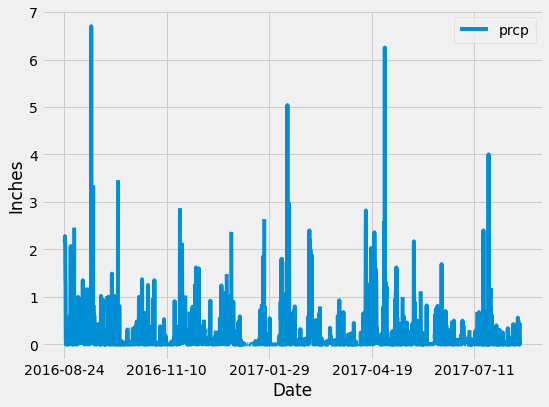

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
df=pd.read_sql("SELECT prcp, date FROM measurement", conn)
df
# Save the query results as a Pandas DataFrame and set the index to the date column
df_one_year = df.loc[df['date']>'2016-08-23']
df_one_year
# Sort the dataframe by date
df_one_year = df_one_year.sort_values('date')
# Use Pandas Plotting with Matplotlib to plot the data
df_one_year.plot(x='date', y='prcp', figsize=(8,6))
plt.ylabel("Inches")
plt.xlabel("Date")

In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_one_year.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [17]:
# Design a query to show how many stations are available in this dataset?
Num_station = session.query(Station).count()
Num_station

9

In [18]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
Active_station = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
for station in Active_station:
    print (station)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [19]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
Temp_actStation = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station=='USC00519281')
for temp in Temp_actStation:
    print(temp)

(54.0, 85.0, 71.66378066378067)


Text(0, 0.5, 'Frequency')

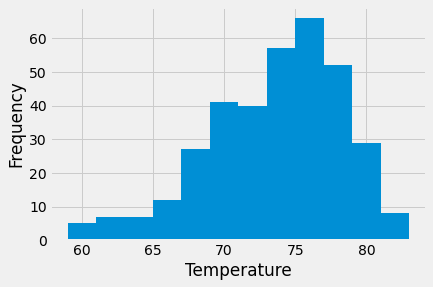

In [20]:
# Choose the station with the highest number of temperature observations.
High_tempStation = session.query(Measurement.tobs, Measurement.date).filter(Measurement.date >'2016-08-23').filter(Measurement.station=='USC00519281').all()
HighTemp=[]
for High_temp in High_tempStation:
    #print(High_temp[0], High_temp[1])
    HighTemp.append(High_temp[0])
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
plt.hist(HighTemp, bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")

## Bonus Challenge Assignment

## Temperature Analysis I

In [80]:
# Hawaii is reputed to enjoy mild weather all year. Is there a meaningful 
# difference between the temperature in, for example, June and December?


# You may either use SQLAlchemy or pandas's read_csv() to perform this portion.
# Dependencies and Setup
import pandas as pd

# File to Load 
file_to_load = "Resources/hawaii_measurements.csv"

# Read File and store into Pandas data frame
hawaii_data = pd.read_csv(file_to_load)

# View the hawaii_data
hawaii_data

# Identify the average temperature in June at all stations across all available years in the dataset. 
# Do the same for December temperature.
# Identify the months from the date values
hawaii_data['month'] = pd.DatetimeIndex(hawaii_data['date']).month
hawaii_data['year'] = pd.DatetimeIndex(hawaii_data['date']).year
hawaii_data

# Identify the average temperature in June at all stations across all available years in the dataset. 

JuneTemp = hawaii_data[hawaii_data['month']== 6]
JuneTemp
AverageTemp_June = JuneTemp['tobs'].mean()

DecTemp = hawaii_data[hawaii_data['month']== 12]
DecTemp
AverageTemp_Dec = DecTemp['tobs'].mean()
AverageTemp_June
AverageTemp_Dec
hawaii_data
DecTemp["year"].nunique()
JuneTemp["year"].nunique()
JuneTemp
# Calculate average temperature of June from 2010 to 2017
June_2010 = JuneTemp["year"]==2010
June_2010

JuneTemp_df = JuneTemp.loc[:, ["station", "tobs", "month", "year"]]
JuneTemp_df

June2010_df = JuneTemp_df.loc[JuneTemp_df["year"] == 2010]
June2010_df
June2010_Ave = June2010_df["tobs"].mean()
June2010_Ave
June2011_df = JuneTemp_df.loc[JuneTemp_df["year"] == 2011]
June2011_Ave = June2011_df["tobs"].mean()
June2011_Ave
June2012_df = JuneTemp_df.loc[JuneTemp_df["year"] == 2012]
June2012_Ave = June2012_df["tobs"].mean()
June2012_Ave
June2013_df = JuneTemp_df.loc[JuneTemp_df["year"] == 2013]
June2013_Ave = June2013_df["tobs"].mean()
June2013_Ave
June2014_df = JuneTemp_df.loc[JuneTemp_df["year"] == 2014]
June2014_Ave = June2014_df["tobs"].mean()
June2014_Ave
June2015_df = JuneTemp_df.loc[JuneTemp_df["year"] == 2015]
June2015_Ave = June2015_df["tobs"].mean()
June2015_Ave
June2016_df = JuneTemp_df.loc[JuneTemp_df["year"] == 2016]
June2016_Ave = June2016_df["tobs"].mean()
June2016_Ave
June2017_df = JuneTemp_df.loc[JuneTemp_df["year"] == 2017]
June2017_Ave = June2017_df["tobs"].mean()
June2017_Ave

# Calculate average temperature of December from 2010 to 2016

DecTemp_df = DecTemp.loc[:, ["station", "tobs", "month", "year"]]
DecTemp_df

Dec2010_df = DecTemp_df.loc[DecTemp_df["year"] == 2010]
Dec2010_Ave = Dec2010_df["tobs"].mean()
Dec2010_Ave

Dec2011_df = DecTemp_df.loc[DecTemp_df["year"] == 2011]
Dec2011_Ave = Dec2011_df["tobs"].mean()
Dec2011_Ave

Dec2012_df = DecTemp_df.loc[DecTemp_df["year"] == 2012]
Dec2012_Ave = Dec2012_df["tobs"].mean()
Dec2012_Ave

Dec2013_df = DecTemp_df.loc[DecTemp_df["year"] == 2013]
Dec2013_Ave = Dec2013_df["tobs"].mean()
Dec2013_Ave

Dec2014_df = DecTemp_df.loc[DecTemp_df["year"] == 2014]
Dec2014_Ave = Dec2014_df["tobs"].mean()
Dec2014_Ave

Dec2015_df = DecTemp_df.loc[DecTemp_df["year"] == 2015]
Dec2015_Ave = Dec2015_df["tobs"].mean()
Dec2015_Ave

Dec2016_df = DecTemp_df.loc[DecTemp_df["year"] == 2016]
Dec2016_Ave = Dec2016_df["tobs"].mean()
Dec2016_Ave


# Use the t-test to determine whether the difference in the means, if any, is statistically significant. 
# Will you use a paired t-test, or an unpaired t-test? Why?

71.13

In [21]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [22]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
temp = calc_temps('2016-02-28', '2016-03-05')
temp

[(62.0, 69.88636363636364, 80.0)]

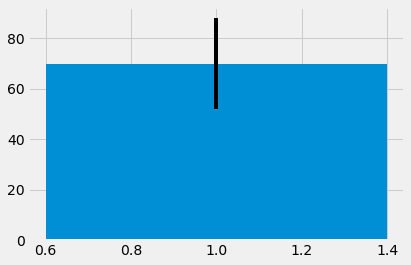

In [23]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
temp[0][0]
temp[0][1]
temp[0][2]
yerr=temp[0][2] - temp[0][0]
plt.bar(1, temp[0][1],yerr=yerr)
plt.show()

In [24]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
total_rainfall = session.query(Station.station, Station.latitude, Station.longitude, Station.elevation, func.sum(Measurement.prcp)).filter(Measurement.date < '2016-03-05').filter(Measurement.date > '2016-02-28').group_by(Station.station).order_by(func.sum(Measurement.prcp).desc()).all()
for total in total_rainfall:
    print(total)

('USC00519523', 21.33556, -157.71139, 19.5, 0.48000000000000004)
('USC00519397', 21.2716, -157.8168, 3.0, 0.48000000000000004)
('USC00519281', 21.45167, -157.84888999999998, 32.9, 0.48000000000000004)
('USC00518838', 21.4992, -158.0111, 306.6, 0.48000000000000004)
('USC00517948', 21.3934, -157.9751, 11.9, 0.48000000000000004)
('USC00516128', 21.3331, -157.8025, 152.4, 0.48000000000000004)
('USC00514830', 21.5213, -157.8374, 7.0, 0.48000000000000004)
('USC00513117', 21.4234, -157.8015, 14.6, 0.48000000000000004)
('USC00511918', 21.3152, -157.9992, 0.9, 0.48000000000000004)


In [25]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [26]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start = "2012-04-07"
end ="2013-05-07"
# Use the start normand end date to create a range of dates
range_date = pd.date_range(start, end, freq="d")
# Strip off the year and save a list of %m-%d strings
days_months = range_date.strftime("%m-%d")
normals=[]
# Loop through the list of %m-%d strings and calculate the normals for each date
for dm in days_months:
    result = daily_normals(dm)
    normals.append(*result)

In [27]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
normals
normals_df = pd.DataFrame(normals, columns=["tmin", "tavg", "tmax"])
normals_df["date"]= range_date
normals_df.set_index(["date"], inplace=True)
normals_df.head()

,tmin,tavg,tmax
date,,,
2012-04-07,63.0,71.105263,78.0
2012-04-08,66.0,72.105263,77.0
2012-04-09,62.0,71.614035,78.0
2012-04-10,64.0,71.403509,79.0
2012-04-11,65.0,72.491803,82.0


Text(0, 0.5, 'Temperature')

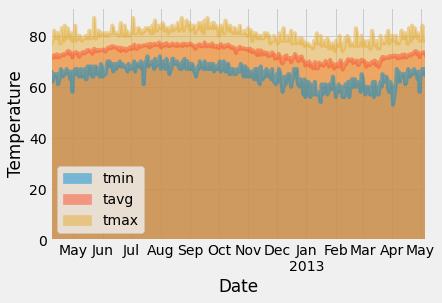

In [29]:
# Plot the daily normals as an area plot with `stacked=False`
ax = normals_df.plot.area(stacked=False)
plt.xlabel("Date")
plt.ylabel("Temperature")